# Importing All Data

## Load all Tracks

In [5]:
from decode import decode_A50, decode_A50_downhill, decode_F6P, decode_tile
import matplotlib.pyplot as plt
from sync import syncTile, splitTileIntoDownhillTracks
from load import load_2022_12_24, load_2022_12_26, load_2022_12_27, load_2023_12_30, load_2023_12_31, load_2024_01_01
from tile import Tile
from track import Track
from stitch import stitch

# No tile data was captured!
# a50_2022_12_24, a50_all_2022_12_24, f6p_2022_12_24, tile_2022_12_24 = load_2022_12_24()
a50_2022_12_26, a50_all_2022_12_26, f6p_2022_12_26, tile_2022_12_26 = load_2022_12_26()
a50_2022_12_27, a50_all_2022_12_27, f6p_2022_12_27, tile_2022_12_27 = load_2022_12_27()
a50_2023_12_30, a50_all_2023_12_30, f6p_2023_12_30, tile_2023_12_30 = load_2023_12_30()
a50_2023_12_31, a50_all_2023_12_31, f6p_2023_12_31, tile_2023_12_31 = load_2023_12_31()
a50_2024_01_01, a50_all_2024_01_01, f6p_2024_01_01, tile_2024_01_01 = load_2024_01_01()

## Synchronize Tile Data with A50 Ground Truth

In [6]:
tile_2022_12_26_sync = syncTile(
    tile=tile_2022_12_26,
    truth=a50_all_2022_12_26,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=10,
    max_alt_search=50)
tile_2022_12_27_sync = syncTile(
    tile=tile_2022_12_27,
    truth=a50_all_2022_12_27,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=0,
    max_alt_search=20)
tile_2023_12_30_sync = syncTile(
    tile=tile_2023_12_30,
    truth=a50_all_2023_12_30,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=120,
    max_alt_search=140)
tile_2023_12_31_sync = syncTile(
    tile=tile_2023_12_31,
    truth=a50_all_2023_12_31,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=5,
    alt_step=0.25,
    min_alt_start=40,
    max_alt_search=45)
tile_2024_01_01_sync = syncTile(
    tile=tile_2024_01_01,
    truth=a50_all_2024_01_01,
    printOutput=True,
    # use_mae=False,
    time_step_s=0.5,
    max_time_search_s=30,
    alt_step=0.25,
    min_alt_start=0,
    max_alt_search=20)

Timestamp offset: 14000
Altitude offset: 35.75
Timestamp offset: 14500
Altitude offset: 0
Timestamp offset: 8000
Altitude offset: 131.75
Timestamp offset: 0
Altitude offset: 42.0
Timestamp offset: 9000
Altitude offset: 11.75


### Stich the A50 Data for Plotting

In [7]:
stitched_a50_all_2022_12_26_time, stitched_a50_all_2022_12_26_alt = stitch(a50_all_2022_12_26)
stitched_f6p_all_2022_12_26_time, stitched_f6p_all_2022_12_26_alt = stitch(f6p_2022_12_26)

stitched_a50_all_2022_12_27_time, stitched_a50_all_2022_12_27_alt = stitch(a50_all_2022_12_27)
stitched_f6p_all_2022_12_27_time, stitched_f6p_all_2022_12_27_alt = stitch(f6p_2022_12_27)

stitched_a50_all_2023_12_30_time, stitched_a50_all_2023_12_30_alt = stitch(a50_all_2023_12_30)
stitched_f6p_all_2023_12_30_time, stitched_f6p_all_2023_12_30_alt = stitch(f6p_2023_12_30)

stitched_a50_all_2023_12_31_time, stitched_a50_all_2023_12_31_alt = stitch(a50_all_2023_12_31)
stitched_f6p_all_2023_12_31_time, stitched_f6p_all_2023_12_31_alt = stitch(f6p_2023_12_31)

stitched_a50_all_2024_01_01_time, stitched_a50_all_2024_01_01_alt = stitch(a50_all_2024_01_01)
stitched_f6p_all_2024_01_01_time, stitched_f6p_all_2024_01_01_alt = stitch(f6p_2024_01_01)

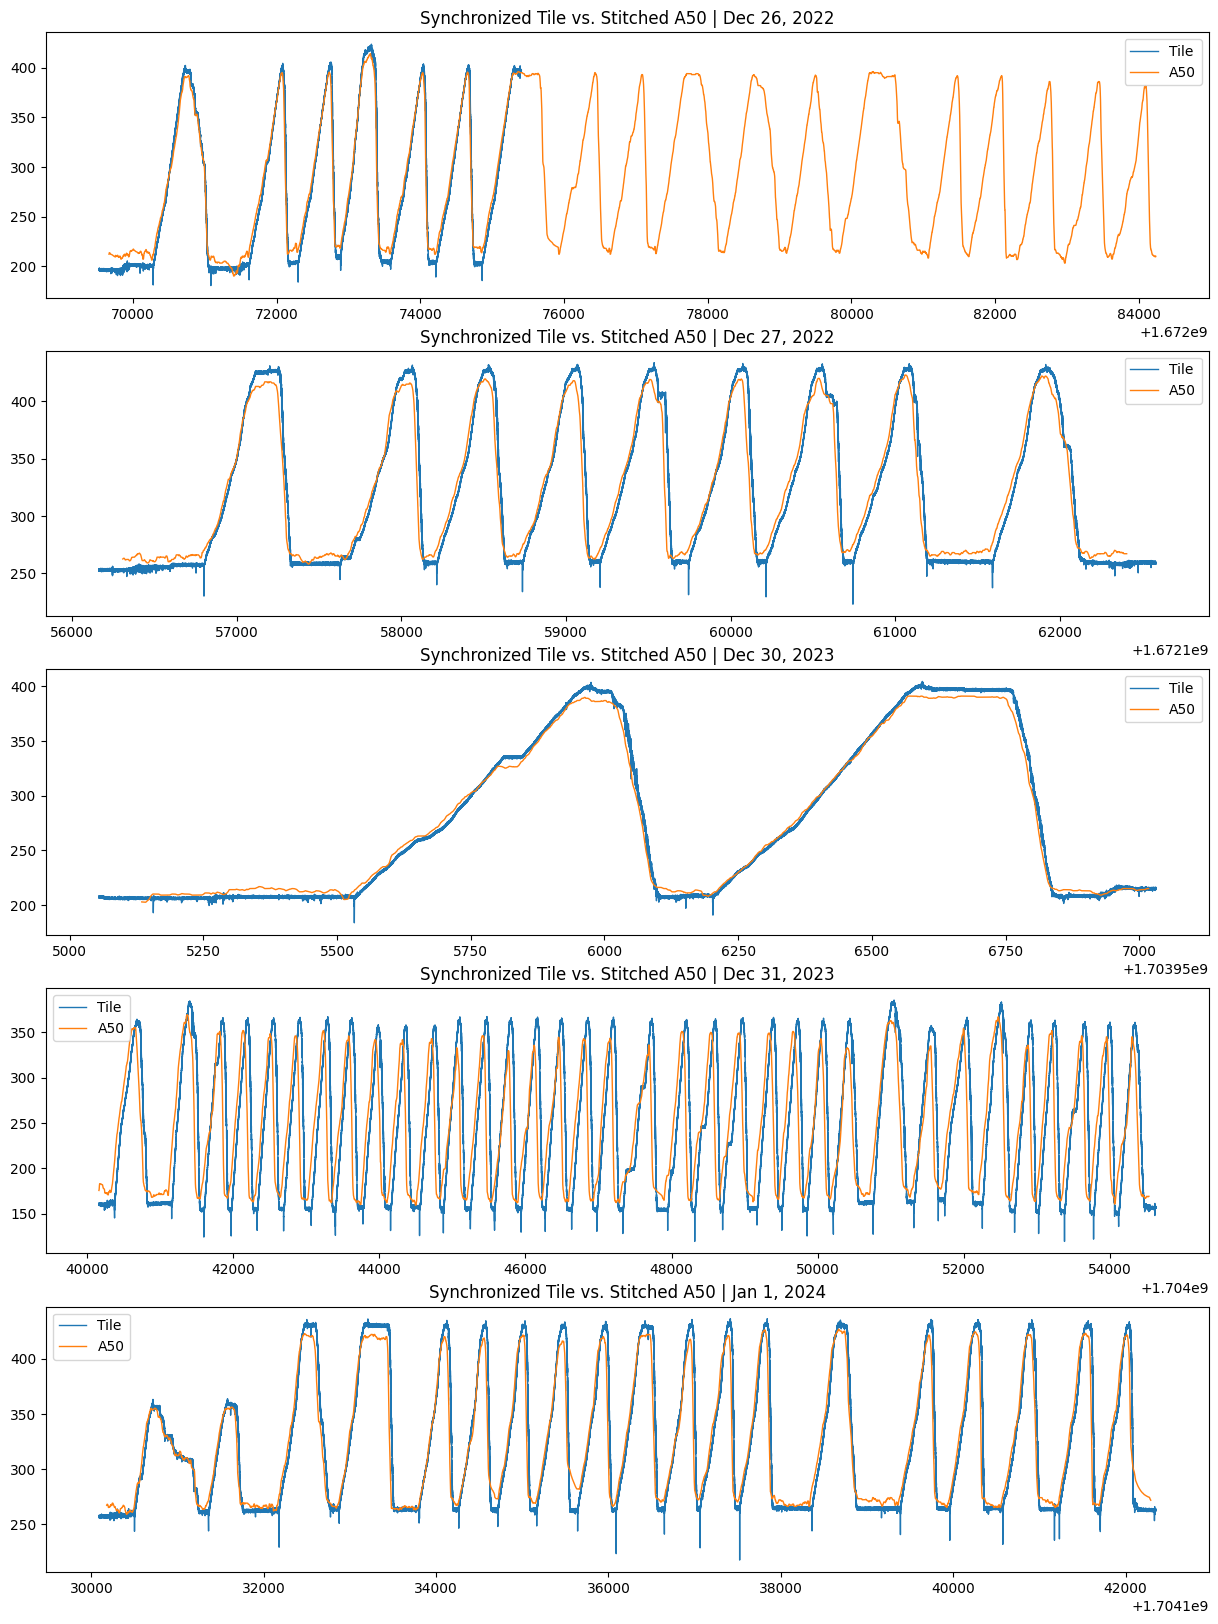

In [8]:
plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(5, figsize=(15, 20))
ax[0].plot(tile_2022_12_26_sync.time, tile_2022_12_26_sync.corrected_alt, label='Tile')
ax[0].plot(stitched_a50_all_2022_12_26_time, stitched_a50_all_2022_12_26_alt, label='A50')
# ax[0].plot(stitched_f6p_all_2022_12_26_time, stitched_f6p_all_2022_12_26_alt, label='F35-no alt data')
ax[0].set_title('Synchronized Tile vs. Stitched A50 | Dec 26, 2022', wrap=True)
ax[0].legend()

ax[1].plot(tile_2022_12_27_sync.time, tile_2022_12_27_sync.corrected_alt, label='Tile')
ax[1].plot(stitched_a50_all_2022_12_27_time, stitched_a50_all_2022_12_27_alt, label='A50')
# ax[1].plot(stitched_f6p_all_2022_12_27_time, stitched_f6p_all_2022_12_27_alt, label='F35-no alt data')
ax[1].set_title('Synchronized Tile vs. Stitched A50 | Dec 27, 2022', wrap=True)
ax[1].legend()

ax[2].plot(tile_2023_12_30_sync.time, tile_2023_12_30_sync.corrected_alt, label='Tile')
ax[2].plot(stitched_a50_all_2023_12_30_time, stitched_a50_all_2023_12_30_alt, label='A50')
# ax[2].plot(stitched_f6p_all_2023_12_30_time, stitched_f6p_all_2023_12_30_alt, label='F6P')
ax[2].set_title('Synchronized Tile vs. Stitched A50 | Dec 30, 2023', wrap=True)
ax[2].legend()

ax[3].plot(tile_2023_12_31_sync.time, tile_2023_12_31_sync.corrected_alt, label='Tile')
ax[3].plot(stitched_a50_all_2023_12_31_time, stitched_a50_all_2023_12_31_alt, label='A50')
# ax[3].plot(stitched_f6p_all_2023_12_31_time, stitched_f6p_all_2023_12_31_alt, label='F6P')
ax[3].set_title('Synchronized Tile vs. Stitched A50 | Dec 31, 2023', wrap=True)
ax[3].legend()

ax[4].plot(tile_2024_01_01_sync.time, tile_2024_01_01_sync.corrected_alt, label='Tile')
ax[4].plot(stitched_a50_all_2024_01_01_time, stitched_a50_all_2024_01_01_alt, label='A50')
# ax[4].plot(stitched_f6p_all_2024_01_01_time, stitched_f6p_all_2024_01_01_alt, label='F6P')
ax[4].set_title('Synchronized Tile vs. Stitched A50 | Jan 1, 2024', wrap=True)
ax[4].legend()
plt.show()

## Split Tile into Downhill `[Tile]` with A50

In [9]:
# print(tile_2022_12_26_sync.time)
# tile_2022_12_26_runs = splitTileIntoDownhillTracks(tile_2022_12_26_sync, f6p_2022_12_26, a50_all_2022_12_26, printOutput=True, start_offset=False)
# tile_2022_12_27_runs = splitTileIntoDownhillTracks(tile_2022_12_27_sync, f6p_2022_12_27, a50_all_2022_12_27, printOutput=True, start_offset=False)
# tile_2023_12_30_runs = splitTileIntoDownhillTracks(tile_2023_12_30_sync, f6p_2023_12_30, a50_all_2023_12_30, printOutput=True, start_offset=False)
# tile_2023_12_31_runs = splitTileIntoDownhillTracks(tile_2023_12_31_sync, f6p_2023_12_31, a50_all_2023_12_31, printOutput=True, start_offset=False)
tile_2024_01_01_runs = splitTileIntoDownhillTracks(tile_2024_01_01_sync, f6p_2024_01_01)#, a50_all_2024_01_01, printOutput=True, start_offset=False)

60700 114200
152800 165500
248900 266800
333700 341200
402600 409200
447400 454200
492500 499000
538900 545500
587300 594700
639900 647500
686400 695000
731100 737100
774000 780900
865200 878000
964800 971000
1020100 1083600
1083800 1090700
1148800 1155000
1193900 1203800
